# Rete di Bayes Indagine criminale
Scriviamo il codice Python necessario per creare un modello di Rete Bayesiana per analizzare la probabilità di colpevolezza di un sospetto in un'indagine criminale. Il modello considera tre elementi di prova: la presenza di un'arma (Arma), un movente (Movente) e un alibi (Alibi), e come questi influenzano la probabilità di colpevolezza (Colpevolezza).

Il codice non richiederà input diretti dall'utente. Invece, definisce la struttura della Rete Bayesiana e imposta le tabelle di probabilità per ciascun fattore basate su valori predefiniti che dovrebbero essere estrapolati da statistiche sulle indagini criminali.

***Descrizione del codice***

L'output di questo codice è:
- un modello di Rete Bayesiana verificato;
- la stampa del modello;
- la stampa delle Distribuzioni di Probabilità Condizionata (CPD) per ogni variabile nella rete;
- il grafo della rete Bayesiana.

Inizialmente, definiamo la struttura della Rete Bayesiana, mostrando come i fattori di prova (Arma, Movente, Alibi) influenzano la colpevolezza (Colpevolezza).
Quindi, definiamo le tabelle di probabilità per ciascun fattore. Ad esempio, la probabilità che un'arma sia presente sia presente sul luogo del delitto la poniamo pari al 70% (0.7) e la sua assenza al 30% (0.3). Più complessa è la definizione della tabella di probabilità per la colpevolezza, che considera tutte le possibili combinazioni dei fattori di prova.
Tutte queste tabelle sono aggiunte al modello di Rete Bayesiana.
Infine, verifichiamo se il modello è definito correttamente e stampiamo tutte le distribuzioni di probabilità.

La logica chiave in questo codice è come esso rappresenta le relazioni tra diversi elementi di prova e la colpevolezza. Ad esempio, la presenza di un'arma, un movente e la mancanza di un alibi aumenterebbero la probabilità di colpevolezza, mentre la loro assenza la diminuirebbe. Questo è riflesso nella tabella di probabilità per 'Colpevolezza', che considera tutte le possibili combinazioni di prove:

| Arma | Motive | Alibi | P(Non Colpevole) | P(Colpevole) |
|------|--------|-------|------------------|--------------|
|  0   |   0    |   0   |       0.1        |     0.9      |
|  0   |   0    |   1   |       0.2        |     0.8      |
|  0   |   1    |   0   |       0.3        |     0.7      |
|  0   |   1    |   1   |       0.4        |     0.6      |
|  1   |   0    |   0   |       0.5        |     0.5      |
|  1   |   0    |   1   |       0.6        |     0.4      |
|  1   |   1    |   0   |       0.7        |     0.3      |
|  1   |   1    |   1   |       0.8        |     0.2      |

In questa tabella:

0 rappresenta l'assenza (di arma, movente o alibi)
1 rappresenta la presenza
Le ultime due colonne mostrano le probabilità di non colpevolezza e colpevolezza per ogni combinazione di evidenze

Questa Rete Bayesiana può essere utilizzata per calcolare la probabilità di colpevolezza dato uno scenario di prove, aiutando gli investigatori a quantificare e ragionare sull'incertezza nei casi criminali.


In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Definizione del modello
model = BayesianNetwork([('Arma', 'Colpevolezza'),
                       ('Movente', 'Colpevolezza'),
                       ('Alibi', 'Colpevolezza')])

# Definizione delle probabilità condizionate
cpd_arma = TabularCPD(variable='Arma', variable_card=2,
                      values=[[0.7], [0.3]])
cpd_Movente = TabularCPD(variable='Movente', variable_card=2,
                        values=[[0.6], [0.4]])
cpd_alibi = TabularCPD(variable='Alibi', variable_card=2,
                       values=[[0.5], [0.5]])
cpd_colpevolezza = TabularCPD(variable='Colpevolezza', variable_card=2,
                              values=[[0.9, 0.7, 0.6, 0.4, 0.6, 0.4, 0.3, 0.1],
                                      [0.1, 0.3, 0.4, 0.6, 0.4, 0.6, 0.7, 0.9]],
                              evidence=['Arma', 'Movente', 'Alibi'],
                              evidence_card=[2, 2, 2])
# cpd_colpevolezza = TabularCPD(variable='Colpevolezza', variable_card=2,
#                               values=[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
#                                       [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]],
#                               evidence=['Arma', 'Movente', 'Alibi'],
#                               evidence_card=[2, 2, 2])

# Aggiunta delle probabilità condizionate al modello
model.add_cpds(cpd_arma, cpd_Movente, cpd_alibi, cpd_colpevolezza)

# Verifica del modello
print("Il modello è corretto: ", model.check_model())

# Stampa del modello
for cpd in model.get_cpds():
    print("CPD di {variable}:".format(variable=cpd.variable))
    print(cpd)

c:\Users\lcapitanio\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Il modello è corretto:  True
CPD di Arma:
+---------+-----+
| Arma(0) | 0.7 |
+---------+-----+
| Arma(1) | 0.3 |
+---------+-----+
CPD di Movente:
+------------+-----+
| Movente(0) | 0.6 |
+------------+-----+
| Movente(1) | 0.4 |
+------------+-----+
CPD di Alibi:
+----------+-----+
| Alibi(0) | 0.5 |
+----------+-----+
| Alibi(1) | 0.5 |
+----------+-----+
CPD di Colpevolezza:
+-----------------+------------+-----+------------+------------+
| Arma            | Arma(0)    | ... | Arma(1)    | Arma(1)    |
+-----------------+------------+-----+------------+------------+
| Movente         | Movente(0) | ... | Movente(1) | Movente(1) |
+-----------------+------------+-----+------------+------------+
| Alibi           | Alibi(0)   | ... | Alibi(0)   | Alibi(1)   |
+-----------------+------------+-----+------------+------------+
| Colpevolezza(0) | 0.9        | ... | 0.3        | 0.1        |
+-----------------+------------+-----+------------+------------+
| Colpevolezza(1) | 0.1        |

Eseguendo la cella qui sotto possiamo vedere il grafo della rete creata:

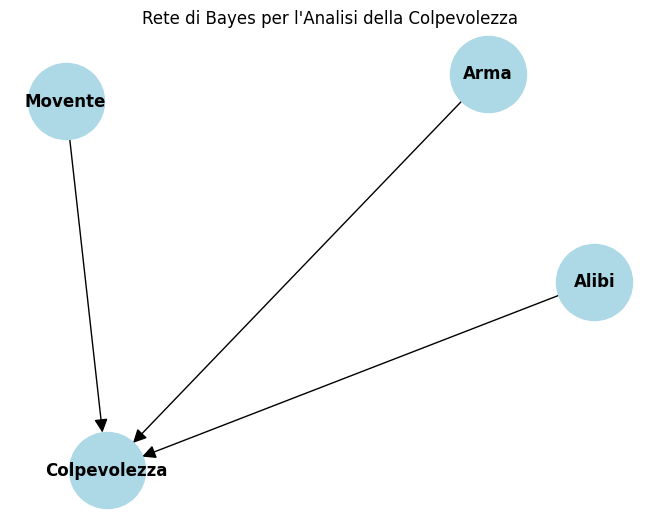

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Assumendo che 'model' sia il tuo BayesianNetwork già definito
G = nx.DiGraph()
G.add_edges_from(model.edges())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

plt.title("Rete di Bayes per l'Analisi della Colpevolezza")
plt.axis('off')
plt.show()

Infine, una volta costruita la rete di Bayes possiamo interrogarla per avere una stima della probabilità di un determinato evento.
Qual è la probabiltà che un indagato senza alibi, senza movente e in assenza di arma del delitto sia colpevole?

In [4]:
from pgmpy.inference import VariableElimination

# Creiamo un oggetto per l'inferenza
inference = VariableElimination(model)

# Definiamo l'evidenza per la situazione descritta
evidence = {
    'Alibi': 1,  # 0 rappresenta l'assenza di alibi
    'Movente': 0, # 0 rappresenta l'assenza di motivo
    'Arma': 0    # 0 rappresenta che l'arma non è stata trovata
}

# Calcoliamo la probabilità di colpevolezza dato l'evidenza
result = inference.query(['Colpevolezza'], evidence=evidence)

# Stampiamo il risultato
print("Probabilità di colpevolezza:")
print(result.values)

Probabilità di colpevolezza:
[0.7 0.3]
